In [ ]:
!pip install geopandas folium


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EMR_Incidents.csv to EMR_Incidents.csv


In [ ]:
import pandas as pd
df = pd.read_csv("EMR_Incidents.csv")

In [ ]:
import pandas as pd

df = pd.read_csv("EMR_Incidents.csv")

df = df.dropna(subset=["Latitude", "Longitude"])

df["Creation Date"] = pd.to_datetime(df["Creation Date"])

df["hour"] = df["Creation Date"].dt.hour
df["dayofweek"] = df["Creation Date"].dt.dayofweek
df["date"] = df["Creation Date"].dt.date


/tmp/ipython-input-2069186229.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Creation Date"] = pd.to_datetime(df["Creation Date"])


In [ ]:
df["Creation Date"] = pd.to_datetime(
    df["Creation Date"],
    format="%m/%d/%Y %I:%M:%S %p",
    errors="coerce"
)


In [ ]:
df.head(10)


,Borough,Creation Date,Latitude,Longitude,hour,dayofweek,date
0,Queens,2017-01-16 13:13:38,40.714004,-73.829989,13,0,2017-01-16
1,Manhattan,2016-10-29 12:13:31,40.714422,-74.006076,12,5,2016-10-29
3,Queens,2016-11-14 15:53:54,40.714004,-73.829989,15,0,2016-11-14
5,Queens,2016-12-02 16:40:13,40.714004,-73.829989,16,4,2016-12-02
6,Manhattan,2016-11-25 04:06:09,40.714422,-74.006076,4,4,2016-11-25
7,Manhattan,2016-12-03 04:17:30,40.714422,-74.006076,4,5,2016-12-03
10,Manhattan,2016-12-14 22:26:17,40.714422,-74.006076,22,2,2016-12-14
11,New York,2016-11-30 00:25:38,40.667490,-73.994286,0,2,2016-11-30
12,Manhattan,2016-11-28 21:51:55,40.714422,-74.006076,21,0,2016-11-28
13,Staten Island,2016-11-29 06:49:45,40.526093,-74.180298,6,1,2016-11-29


In [ ]:
df.tail(10)


,Borough,Creation Date,Latitude,Longitude,hour,dayofweek,date
11702,Brooklyn,2016-11-21 16:11:09,40.649725,-73.967521,16,0,2016-11-21
11703,Manhattan,2016-10-27 03:40:16,40.714422,-74.006076,3,3,2016-10-27
11705,Bronx,2016-11-24 13:57:13,40.809916,-73.905894,13,3,2016-11-24
11706,Queens,2016-11-22 12:24:02,40.714004,-73.829989,12,1,2016-11-22
11713,Brooklyn,2018-11-08 12:23:15,40.725779,-73.946012,12,3,2018-11-08
11717,Queens,2021-03-10 06:17:00,40.706180,-73.785535,6,2,2021-03-10
11718,Manhattan,2021-12-16 07:26:15,40.723829,-73.975411,7,3,2021-12-16
11721,Brooklyn,2022-06-26 16:08:42,40.639581,-74.012289,16,6,2022-06-26
11725,Brooklyn,2012-03-13 20:13:27,40.706068,-73.996872,20,1,2012-03-13
11748,Queens,2016-11-14 11:25:49,40.643847,-73.780295,11,0,2016-11-14


In [ ]:
pd.concat([df.head(10), df.tail(10)])


,Borough,Creation Date,Latitude,Longitude,hour,dayofweek,date
0,Queens,2017-01-16 13:13:38,40.714004,-73.829989,13,0,2017-01-16
1,Manhattan,2016-10-29 12:13:31,40.714422,-74.006076,12,5,2016-10-29
3,Queens,2016-11-14 15:53:54,40.714004,-73.829989,15,0,2016-11-14
5,Queens,2016-12-02 16:40:13,40.714004,-73.829989,16,4,2016-12-02
6,Manhattan,2016-11-25 04:06:09,40.714422,-74.006076,4,4,2016-11-25
7,Manhattan,2016-12-03 04:17:30,40.714422,-74.006076,4,5,2016-12-03
10,Manhattan,2016-12-14 22:26:17,40.714422,-74.006076,22,2,2016-12-14
11,New York,2016-11-30 00:25:38,40.667490,-73.994286,0,2,2016-11-30
12,Manhattan,2016-11-28 21:51:55,40.714422,-74.006076,21,0,2016-11-28
13,Staten Island,2016-11-29 06:49:45,40.526093,-74.180298,6,1,2016-11-29


In [ ]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)
gdf = gdf.to_crs("EPSG:2263")
gdf["x"] = gdf.geometry.x
gdf["y"] = gdf.geometry.y


In [ ]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
HeatMap(df[["Latitude", "Longitude"]].values).add_to(m)
m


In [ ]:
df["Borough"].value_counts()


,count
Borough,
Manhattan,3210
Brooklyn,2627
Queens,1832
Bronx,1462
Staten Island,496
manhattan,102
staten island,15
Jamaica,12
Staten ISland,9


In [ ]:
# Normalize to lowercase and strip spaces
df["Borough_clean"] = df["Borough"].str.strip().str.lower()

borough_map = {
    # Manhattan variants
    "manhattan": "Manhattan",
    "manhhattan": "Manhattan",
    "manhaatan": "Manhattan",
    "mahattan": "Manhattan",
    "mnahattan": "Manhattan",
    "manhatten": "Manhattan",
    "manhatan": "Manhattan",
    "manhttan": "Manhattan",
    "manhatta": "Manhattan",
    "mamhattan": "Manhattan",
    "manhattan (pier 92)": "Manhattan",
    "manhattan (waldorf astoria)": "Manhattan",

    # Brooklyn variants
    "brooklyn": "Brooklyn",
    "brooklyn (nycha-brevoort)": "Brooklyn",

    # Queens variants
    "queens": "Queens",
    "queen": "Queens",
    "quenns": "Queens",
    "quenns": "Queens",
    "flushing": "Queens",
    "rockaway": "Queens",
    "rockaway park": "Queens",
    "jamaica": "Queens",
    "jamaice": "Queens",
    "richmond hill": "Queens",
    "hollis": "Queens",
    "long island city": "Queens",
    "astoria": "Queens",
    "howard beach": "Queens",

    # Bronx variants
    "bronx": "Bronx",
    "brinx": "Bronx",
    "bronx (nycha)": "Bronx",

    # Staten Island variants
    "staten island": "Staten Island",
    "staten isalnd": "Staten Island",
    "staten island (midland beach area)": "Staten Island",
    "saten island": "Staten Island",
    "staten island": "Staten Island",
    "staten island": "Staten Island"
}

df["Borough_clean"] = df["Borough_clean"].map(borough_map)

# Keep only the 5 boroughs
df = df[df["Borough_clean"].isin(["Manhattan","Brooklyn","Queens","Bronx","Staten Island"])]

print(df["Borough_clean"].value_counts())


Borough_clean
Manhattan        3337
Brooklyn         2629
Queens           1866
Bronx            1464
Staten Island     525
Name: count, dtype: int64


In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances

def k_center(X, k):
    centers = [np.random.choice(len(X))]
    while len(centers) < k:
        dists = pairwise_distances(X, X[centers]).min(axis=1)
        next_center = np.argmax(dists)
        centers.append(next_center)
    return centers

X = df[["Longitude", "Latitude"]].values
centers_idx = k_center(X, 5)

df["is_center"] = df.index.isin(centers_idx)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

def clean_nyc_data(df):
    df = df.dropna(subset=["Latitude", "Longitude"])

    lat_min, lat_max = 40.4, 41.0
    lon_min, lon_max = -74.3, -73.6

    df = df[(df["Latitude"].between(lat_min, lat_max)) &
            (df["Longitude"].between(lon_min, lon_max))]
    return df.reset_index(drop=True)

df = clean_nyc_data(df)

# --- Step 2. Define K-Center function ---
def k_center(X, k):
    centers = [np.random.choice(len(X))]
    while len(centers) < k:
        dists = pairwise_distances(X, X[centers]).min(axis=1)
        next_center = np.argmax(dists)
        centers.append(next_center)
    return centers

X = df[["Longitude", "Latitude"]].values
centers_idx = k_center(X, k=5)
df["is_center"] = df.index.isin(centers_idx)




In [ ]:
lat_min, lat_max = 40.4, 41.0
lon_min, lon_max = -74.3, -73.6

df = df[(df["Latitude"].between(lat_min, lat_max)) &
        (df["Longitude"].between(lon_min, lon_max))]


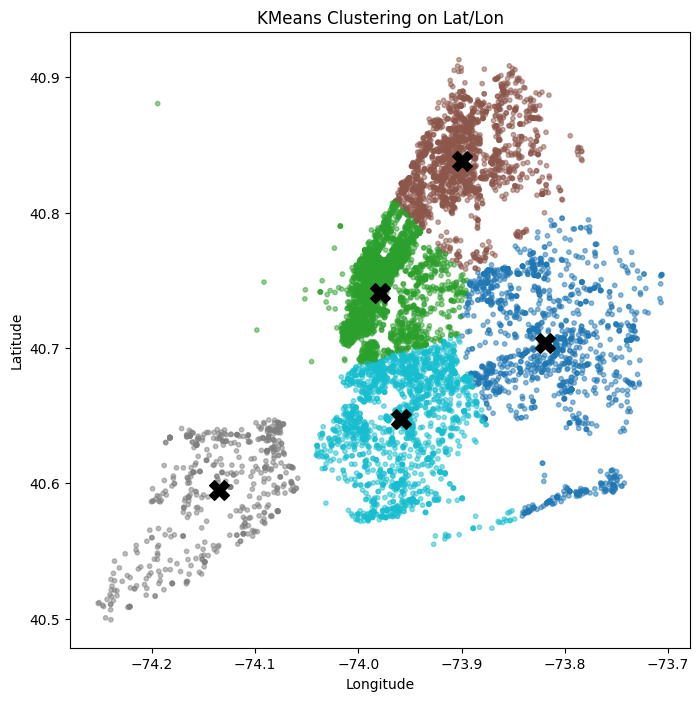

In [ ]:
from sklearn.cluster import KMeans

X = df[["Longitude", "Latitude"]].dropna().values
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
df["cluster"] = kmeans.labels_
X = df[["Longitude", "Latitude"]].dropna().values
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
df["cluster"] = kmeans.labels_

plt.figure(figsize=(8,8))
plt.scatter(df["Longitude"], df["Latitude"], c=df["cluster"], cmap="tab10", s=10, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="black", s=200, marker="X")
plt.title("KMeans Clustering on Lat/Lon")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
#k-center
import folium
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

for _, row in df.sample(1000).iterrows():
    folium.CircleMarker(
        [row["Latitude"], row["Longitude"]],
        radius=2, color="blue", fill=True, fill_opacity=0.5
    ).add_to(m)

for lon, lat in kmeans.cluster_centers_:
    folium.Marker([lat, lon], icon=folium.Icon(color="red")).add_to(m)

m


In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np

def evaluate_clustering(X, centers):
    dists = pairwise_distances(X, centers).min(axis=1)
    return {
        "avg_distance": np.mean(dists),
        "max_distance": np.max(dists),
    }

X = df[["Longitude", "Latitude"]].values
metrics_kmeans = evaluate_clustering(X, kmeans.cluster_centers_)

centers_idx = np.where(df["is_center"])[0]
metrics_kcenter = evaluate_clustering(X, X[centers_idx])

print("KMeans:", metrics_kmeans)
print("KCenter:", metrics_kcenter)


KMeans: {'avg_distance': np.float64(0.041507743406074174), 'max_distance': np.float64(0.2564221089567121)}
KCenter: {'avg_distance': np.float64(0.08945180924187263), 'max_distance': np.float64(0.17576417853787757)}


In [ ]:
results = []
for k in [3, 5, 10, 15]:
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    m_kmeans = evaluate_clustering(X, km.cluster_centers_)
    results.append(("KMeans", k, m_kmeans))

    c_idx = k_center(X, k)
    m_kcenter = evaluate_clustering(X, X[c_idx])
    results.append(("KCenter", k, m_kcenter))

import pandas as pd
results_df = pd.DataFrame([
    {"method": r[0], "k": r[1], **r[2]} for r in results
])
results_df


,method,k,avg_distance,max_distance
0,KMeans,3,0.059463,0.314283
1,KCenter,3,0.162686,0.317579
2,KMeans,5,0.041508,0.256422
3,KCenter,5,0.109129,0.202780
4,KMeans,10,0.030333,0.248019
5,KCenter,10,0.049858,0.118626
6,KMeans,15,0.022767,0.248938
7,KCenter,15,0.039959,0.083523
